In [36]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset
train_df = pd.read_csv("../data/train_features.csv")

In [19]:
train_df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature_Diff
0,0,2752,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,9.0
1,1,8620,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,9.5
2,2,2344,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,9.2
3,3,4704,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,9.9
4,4,9727,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,9220,2,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,11.3
136425,136425,838,0,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,11.0
136426,136426,5502,1,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,11.3
136427,136427,5024,1,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,9.2


In [20]:
# Define the target and features
X = train_df.drop(columns=["id", "Machine failure"])
y = train_df["Machine failure"]

In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.0038481272447408927
R^2 Score: 0.7563630667624536


In [24]:
type(y_test)

pandas.core.series.Series

In [25]:
type(y_pred)

numpy.ndarray

In [26]:
# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (y_prob >= 0.5).astype(int)

# Ensure y_test is in binary format
y_test = y_test.astype(int)

In [27]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9960785750934545


In [29]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.98      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.89      0.93     27286
weighted avg       1.00      1.00      1.00     27286



In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[26841     7]
 [  100   338]]


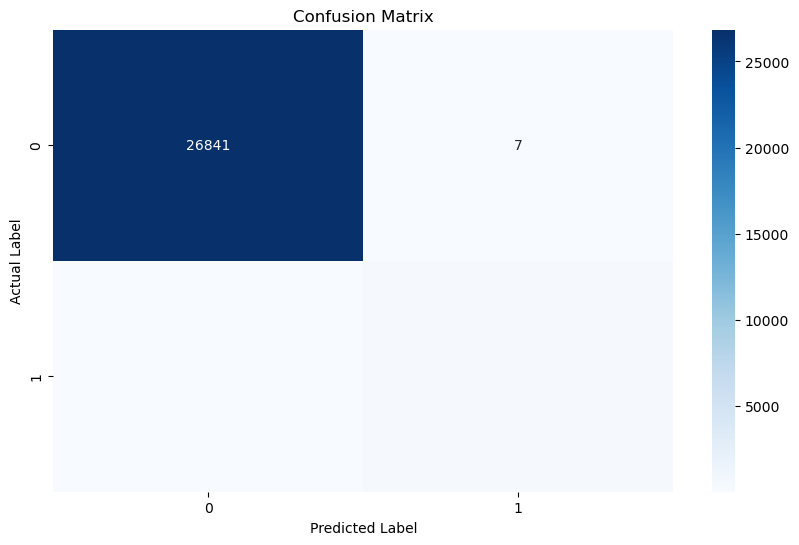

In [33]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [34]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9453803179475457


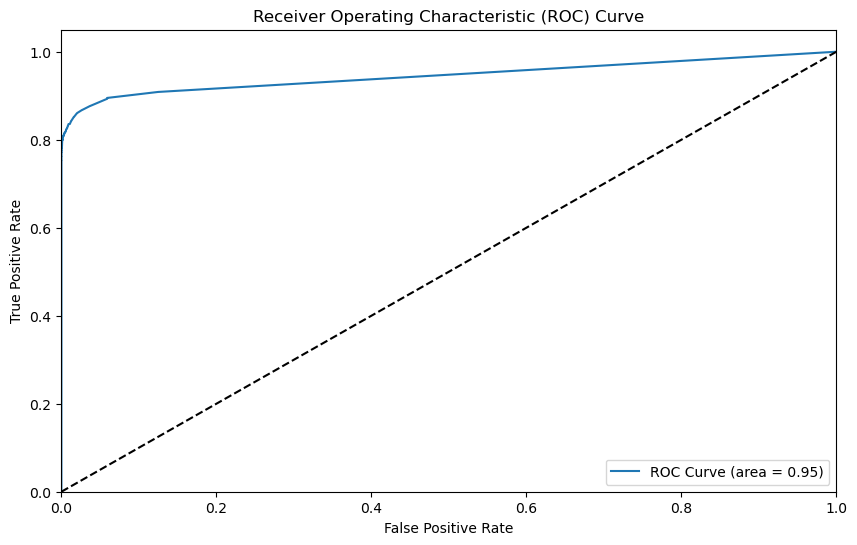

In [35]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [37]:
# Create the models directory if it doesn't exist
os.makedirs("../models", exist_ok=True)

# Save the model for future use
import joblib

joblib.dump(model, "../models/random_forest_model.pkl")

['../models/random_forest_model.pkl']